In [31]:
import pandas as pd
import numpy as np

In [231]:
# ee - list of analysts names (e.g. Analyst 1, analyst 2) 
# cc - list of criteria labels
# dd - list of data source labels
# ww - matrix of criteria evaluations (len(ee) x len(cc))
# yy - matrices of data source evaluations (len(ee) x len(dd) x len(cc))
# bb - baseline estimates (len(ee) x len(dd))

def apply_the_method(ee, cc,dd, ww, yy, bb):

    # Normalizing criteria scores
    criteria = pd.DataFrame({'criteria': cc})
    for ai,a in enumerate(ee):
        criteria[a] = ww[ai] / np.array(ww[ai]).sum()
#   print("Criteria scores (normalized)")
#   display(criteria)
    
# Baseline calculation
    baseline = pd.DataFrame({'source':dd})
    for index,a in enumerate(ee):
        baseline[a] = bb[index] / np.array(bb[index]).sum()
    baseline['mean'] = baseline[ee].mean(axis=1)
#     print("Baseline scores (normalized)")
#     display(baseline)

    
    # Applying the method
    data_sources = pd.DataFrame({'source':dd})
    results = pd.DataFrame({'source':dd})


    for ai, a in enumerate(ee):  
        for ci,c in enumerate(cc):
    #       normalized values for current analyst
            data_sources[c] = np.transpose(yy[ai])[ci] / np.array(np.transpose(yy[ai])[ci]).sum()     

    # Multiply normalized scores by criteria importance    
        results[a] = data_sources[cc].values @ criteria[a].values
    results['mean'] = results[ee].mean(axis=1)

#     print('Results from the method')
#     display(results.sort_values('mean'))
    return criteria, baseline, results


In [368]:
# Data from case 1
ee = ["Analyst 1", "Analyst 2"]


cc = [
    "Knowledge of the product",
    "Accessibility",
    "Trust",
    "Value per purchase",
    "Life-time value",
    "Capacity to contribute",
]

dd = [
    "Key customers",
    "Similar Products",
    "Internal engineers",
    "New Customers",
    "Technologies",
    "Technology trends",
    "Business Needs",
    "Engineering concerns",
    "Laws, regulations",
    "Industry standards",
    "Product vision",
    "Average customer",
]

# Criteria importance
ww = [
    [3, 2, 5, 3, 4, 2], 
    [4, 5, 3, 4, 4, 3]
]  # (* Analyst 1*)  # (*  Analyst 2 *)


yy = [
    [  # (*Analyst 1 *)
        [5, 5, 5, 0, 3, 3],
        [2, 4, 0, 0, 0, 0],
        [5, 5, 5, 0, 0, 5],
        [1, 2, 2, 5, 5, 2],
        [0, 4, 0, 0, 0, 0],
        [3, 3, 2, 0, 0, 0],
        [5, 3, 4, 0, 0, 5],
        [5, 4, 3, 0, 0, 3],
        [2, 2, 2, 0, 0, 0],
        [3, 2, 3, 0, 0, 3],
        [5, 4, 4, 0, 0, 5],
        [2, 4, 3, 0, 5, 2],
    ],
    [  # (* Analyst 2 *)
        [5, 5, 4, 5, 3, 4],
        [3, 4, 4, 0, 0, 2],
        [3, 5, 4, 0, 0, 3],
        [4, 3, 3, 5, 4, 4],
        [1, 5, 4, 0, 0, 4],
        [4, 5, 4, 0, 0, 5],
        [5, 5, 5, 4, 5, 4],
        [5, 5, 5, 0, 0, 4],
        [1, 3, 4, 0, 0, 3],
        [4, 3, 1, 0, 0, 5],
        [5, 5, 4, 4, 5, 5],
        [4, 5, 3, 5, 5, 3],
    ],
]

# (* Initial estimate, Baseline *)
bb = [
    [4, 3, 5, 0, 2, 0, 5, 1, 0, 2, 5, 0],  # (*    Analyst 1*)
    [5, 3, 1, 4, 2, 3, 5, 4, 1, 5, 5, 2],  # (*    Analyst 2 *)
]


# (* END of Case 1 *)


In [435]:
criteria, baseline, results = apply_the_method(ee, cc,dd, ww, yy, bb)

display(criteria)
print(criteria.sum())
display(baseline)
print(baseline.sum())
display(results)
print(results.sum())


Criteria scores (normalized)


,criteria,Analyst 1,Analyst 2,Analyst 3,Analyst 4,Analyst 5,Analyst 6
0,Knowledge about market direction (market leaders),0.16,0.208333,0.20,0.055556,0.130435,0.148148
1,Knowledge about mainstream market (follwoers),0.08,0.125000,0.16,0.055556,0.130435,0.185185
2,Monetarty value (revenue),0.20,0.166667,0.12,0.277778,0.217391,0.185185
3,Investment of accessing the source/stakeholder,0.12,0.083333,0.08,0.166667,0.086957,0.074074
4,Knowledge about product technical limitations/...,0.08,0.083333,0.16,0.055556,0.173913,0.111111
5,Risk of tunnel vision,0.20,0.166667,0.08,0.222222,0.043478,0.111111
6,Risk on non-compliance,0.16,0.166667,0.20,0.166667,0.217391,0.185185


criteria     Knowledge about market direction (market leade...
Analyst 1                                                    1
Analyst 2                                                    1
Analyst 3                                                    1
Analyst 4                                                    1
Analyst 5                                                    1
Analyst 6                                                    1
dtype: object


,source,Analyst 1,Analyst 2,Analyst 3,Analyst 4,Analyst 5,Analyst 6,mean
0,Key customers panel,0.081633,0.131579,0.000000,0.090909,0.114286,0.097561,0.085995
1,The executive,0.040816,0.078947,0.083333,0.054545,0.028571,0.048780,0.055832
2,Competition,0.081633,0.026316,0.000000,0.036364,0.028571,0.097561,0.045074
3,Feedback from launch customers,0.040816,0.131579,0.083333,0.054545,0.114286,0.097561,0.087020
4,Product telemetry,0.040816,0.000000,0.000000,0.090909,0.114286,0.048780,0.049132
5,Product maintenance teams,0.020408,0.105263,0.208333,0.090909,0.057143,0.024390,0.084408
6,Engineering teams,0.040816,0.078947,0.208333,0.090909,0.028571,0.097561,0.090856
7,Market research,0.102041,0.026316,0.000000,0.054545,0.085714,0.073171,0.056965
8,Standards/regulations,0.081633,0.052632,0.208333,0.090909,0.142857,0.097561,0.112321
9,Accounting principles,0.081633,0.105263,0.208333,0.090909,0.142857,0.073171,0.117028


source       Key customers panelThe executiveCompetitionFee...
Analyst 1                                                    1
Analyst 2                                                    1
Analyst 3                                                    1
Analyst 4                                                    1
Analyst 5                                                    1
Analyst 6                                                    1
mean                                                         1
dtype: object


,source,Analyst 1,Analyst 2,Analyst 3,Analyst 4,Analyst 5,Analyst 6,mean
0,Key customers panel,0.056730,0.099482,0.078856,0.089203,0.086771,0.073011,0.080675
1,The executive,0.107946,0.082388,0.080773,0.055015,0.070974,0.064060,0.076859
2,Competition,0.045345,0.057819,0.055375,0.039129,0.066394,0.067427,0.055248
3,Feedback from launch customers,0.060756,0.071732,0.072900,0.094034,0.083059,0.071804,0.075714
4,Product telemetry,0.066760,0.058540,0.071536,0.057430,0.077119,0.060774,0.065360
5,Product maintenance teams,0.061176,0.045920,0.071569,0.094034,0.079610,0.054416,0.067788
6,Engineering teams,0.079582,0.065069,0.079692,0.020827,0.067894,0.067337,0.063400
7,Market research,0.109762,0.086600,0.085694,0.104135,0.065825,0.074321,0.087723
8,Standards/regulations,0.055943,0.042915,0.059122,0.057430,0.047457,0.072484,0.055892
9,Accounting principles,0.039661,0.039525,0.074780,0.039129,0.047457,0.069472,0.051671


source       Key customers panelThe executiveCompetitionFee...
Analyst 1                                                    1
Analyst 2                                                    1
Analyst 3                                                    1
Analyst 4                                                    1
Analyst 5                                                    1
Analyst 6                                                    1
mean                                                         1
dtype: object


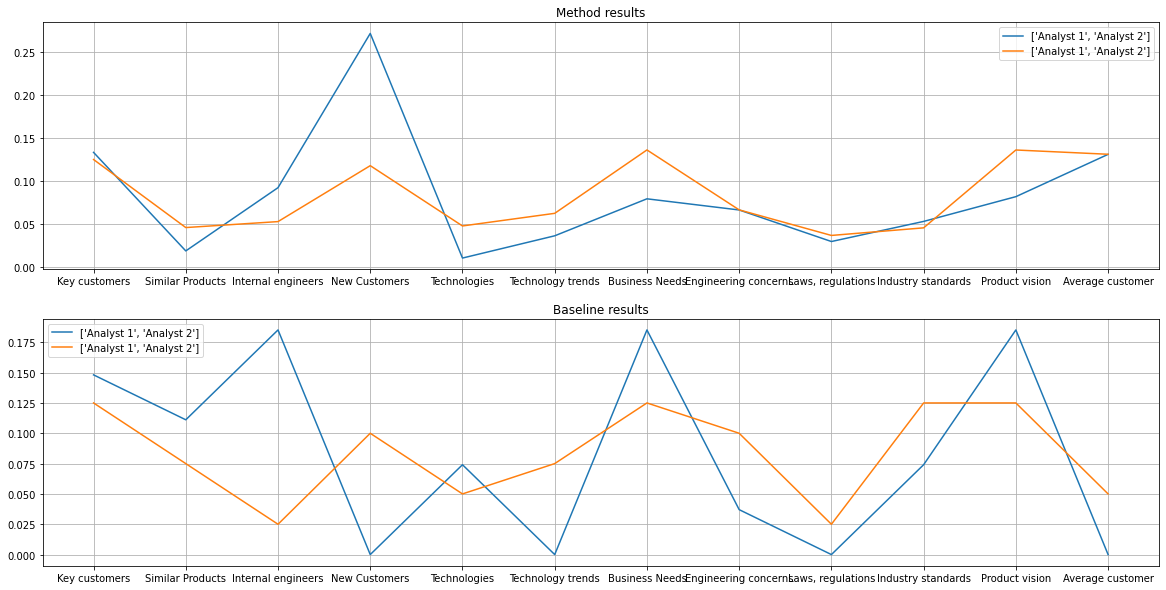

In [409]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1,figsize=(20,10))

data = {"Method results":results[ee], "Baseline results":baseline[ee]}

for index,title in enumerate(data.keys()):
    ax[index].set_title(title)
    ax[index].plot(data[title], label=ee)

    ax[index].set_xticks(range(len(dd)))
    ax[index].set_xticklabels(dd)
    ax[index].grid()
    ax[index].legend()

In [410]:
# CASE II

ee = ["Analyst 1", "Analyst 2"]
cc = [
    "Level of knowledge",
    "Amount of experience",
    "Revenue ",
    "Associated costs",
    "Opportunity cost",
    "Generic risk ",
    "Timing ",
    "Ease of use",
    "Suitability for collaboration",
]


dd = [
    "Key accounts",
    "Customer clinics",
    "Regulations",
    "Dealers",
    "Operators",
    "Product planning group",
    "Regional partners",
]


ww = [
    [4, 4, 5, 5, 4, 3, 3, 2, 3],  
    [5, 4, 4, 4, 2, 5, 3, 3, 1],  
]


yy = [
    [  # (*Analyst 1 *)
        [1, 2, 5, 3, 5, 5, 3, 4, 4],
        [2, 2, 2, 2, 3, 4, 4, 5, 5],
        [4, 5, 3, 4, 5, 5, 2, 2, 2],
        [2, 2, 5, 5, 5, 4, 4, 3, 3],
        [1, 5, 2, 2, 2, 5, 3, 5, 5],
        [2, 2, 5, 5, 5, 5, 5, 2, 2],
        [3, 4, 5, 5, 5, 5, 5, 2, 4],
    ],
    [  # (* Analyst 2 *)
        [3, 3, 5, 1, 3, 2, 3, 3, 4],
        [2, 2, 1, 0, 2, 1, 1, 3, 2],
        [5, 0, 0, 2, 3, 5, 1, 1, 1],
        [3, 1, 4, 4, 4, 2, 4, 4, 3],
        [2, 1, 2, 1, 2, 1, 2, 2, 0],
        [5, 2, 5, 4, 2, 3, 3, 3, 2],
        [5, 2, 5, 3, 3, 3, 3, 4, 3],
    ],
]

# (* Initial estimate, Baseline *)
bb = [
    [5, 2, 4, 3, 1, 1, 4], 
    [5, 1, 5, 3, 2, 5, 5]
]


# (* END of Case 2*)


Criteria scores (normalized)


,criteria,Analyst 1,Analyst 2
0,Level of knowledge,0.121212,0.161290
1,Amount of experience,0.121212,0.129032
2,Revenue,0.151515,0.129032
3,Associated costs,0.151515,0.129032
4,Opportunity cost,0.121212,0.064516
5,Generic risk,0.090909,0.161290
6,Timing,0.090909,0.096774
7,Ease of use,0.060606,0.096774
8,Suitability for collaboration,0.090909,0.032258


criteria     Level of knowledgeAmount of experienceRevenue ...
Analyst 1                                                    1
Analyst 2                                                    1
dtype: object


,source,Analyst 1,Analyst 2,mean
0,Key accounts,0.25,0.192308,0.221154
1,Customer clinics,0.10,0.038462,0.069231
2,Regulations,0.20,0.192308,0.196154
3,Dealers,0.15,0.115385,0.132692
4,Operators,0.05,0.076923,0.063462
5,Product planning group,0.05,0.192308,0.121154
6,Regional partners,0.20,0.192308,0.196154


source       Key accountsCustomer clinicsRegulationsDealers...
Analyst 1                                                    1
Analyst 2                                                    1
mean                                                         1
dtype: object


,source,Analyst 1,Analyst 2,mean
0,Key accounts,0.134192,0.161831,0.148012
1,Customer clinics,0.118543,0.083017,0.100780
2,Regulations,0.153528,0.119769,0.136649
3,Dealers,0.148398,0.170089,0.159243
4,Operators,0.122209,0.082307,0.102258
5,Product planning group,0.148378,0.190602,0.169490
6,Regional partners,0.174751,0.192384,0.183568


source       Key accountsCustomer clinicsRegulationsDealers...
Analyst 1                                                    1
Analyst 2                                                    1
mean                                                         1
dtype: object


<AxesSubplot:xlabel='source'>

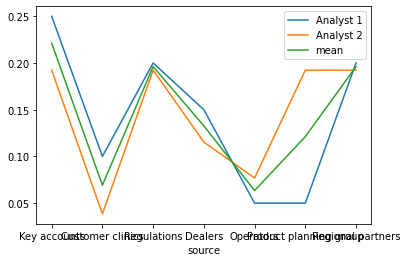

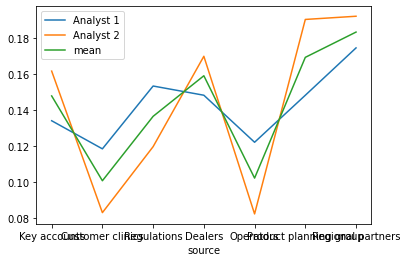

In [411]:
criteria, baseline, results = apply_the_method(ee, cc,dd, ww, yy, bb)

display(criteria)
print(criteria.sum())
display(baseline)
print(baseline.sum())
display(results)
print(results.sum())
baseline.set_index('source').plot()
results.set_index('source').plot()

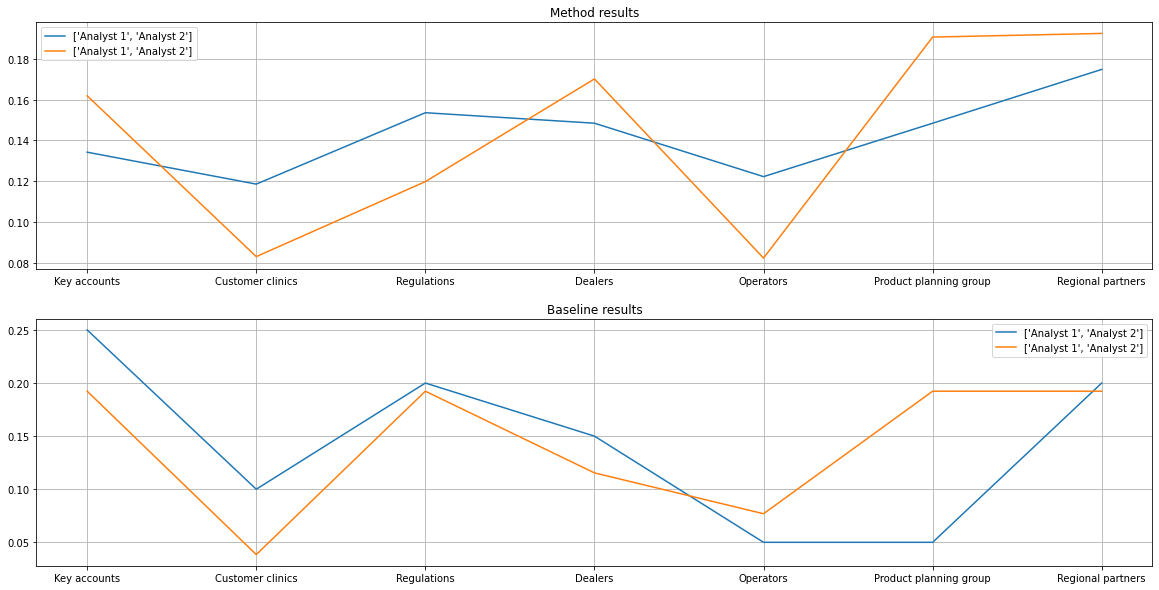

In [412]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1,figsize=(20,10))

data = {"Method results":results[ee], "Baseline results":baseline[ee]}

for index,title in enumerate(data.keys()):
    ax[index].set_title(title)
    ax[index].plot(data[title], label=ee)

    ax[index].set_xticks(range(len(dd)))
    ax[index].set_xticklabels(dd)
    ax[index].grid()
    ax[index].legend()

In [413]:

# (* Case 3 *)
ee = [
   "Analyst 1",
   "Analyst 2",
   "Analyst 3",
   "Analyst 4",
   "Analyst 5",
   "Analyst 6"
   
]


cc = [
    "Knowledge about market direction (market leaders)",
    "Knowledge about mainstream market (follwoers)",
    "Monetarty value (revenue)", 
    "Investment of accessing the source/stakeholder",
    "Knowledge about product technical limitations/possibilities", 
    "Risk of tunnel vision",
    "Risk on non-compliance"
    
]
dd = ["Key customers panel",
    "The executive",
    "Competition",
    "Feedback from launch customers",
    "Product telemetry",
    "Product maintenance teams",
    "Engineering teams",
    "Market research",
    "Standards/regulations",
    "Accounting principles",
    "Prospects",
    "Sales",
    "Marketing",
    "External analysts"]


ww = [
   [4, 2, 5, 3, 2, 5, 4],
   [5, 3, 4, 2, 2, 4, 4],
   [5, 4, 3, 2, 4, 2, 5],
   [1, 1, 5, 3, 1, 4, 3],
   [3, 3, 5, 2, 4, 1, 5],
   [4, 5, 5, 2, 3, 3, 5]
   
   ];

yy = [
    [
        [4, 1, 1, 1, 4, 1, 5],
        [5, 2, 5, 4, 2, 4, 4],
        [4, 2, 1, 1, 1, 1, 3],
        [4, 3, 1, 1, 3, 2, 4],
        [2, 2, 2, 2, 5, 3, 2],
        [1, 1, 3, 2, 4, 3, 1],
        [1, 1, 3, 3, 5, 5, 1],
        [5, 4, 5, 2, 2, 5, 5],
        [4, 4, 1, 1, 1, 1, 5],
        [1, 1, 1, 1, 1, 1, 5],
        [4, 2, 1, 1, 1, 1, 5],
        [4, 4, 5, 1, 2, 5, 5],
        [5, 5, 5, 1, 1, 5, 5],
        [5, 5, 3, 1, 1, 1, 1],
    ],
    [
        [3, 4, 4, 3, 4, 5, 3],
        [4, 4, 2, 2, 4, 3, 3],
        [3, 4, 0, 0, 3, 3, 3],
        [2, 3, 2, 4, 5, 3, 2],
        [0, 4, 1, np.nan, 3, 4, np.nan],
        [0, 3, 0, 0, 4, 4, 3],
        [3, 4, 0, np.nan, 2, 4, 3],
        [5, 4, 3, np.nan, 3, 2, 2],
        [3, 4, 0, np.nan, 0, 3, 0],
        [0, 4, 0, np.nan, 0, 4, 2],
        [4, 4, 4, 3, 2, 2, 3],
        [4, 4, 4, 3, 2, 2, 3],
        [4, 4, 4, np.nan, 3, 2, 3],
        [5, 4, 3, np.nan, 2, 3, 1],
    ],
    [
        [5, 5, 4, 1, 1, 1, np.nan],
        [4, 3, np.nan, np.nan, 1, 5, 5],
        [3, 3, np.nan, 1, 2, 4, 1],
        [5, 5, 5, 1, 1, 4, 1],
        [2, 2, 5, 4, 2, 4, 3],
        [1, 1, 1, 1, 5, 4, 5],
        [3, 3, 3, 1, 4, 5, 3],
        [4, 4, 2, 4, np.nan, 3, np.nan],
        [1, 1, 4, 4, 1, 1, 5],
        [3, 3, 3, 2, np.nan, 4, 5],
        [4, 4, 5, 2, np.nan, 3, np.nan],
        [3, 3, 1, 1, 1, 3, 1],
        [3, 3, 5, 1, 1, 2, 1],
        [4, 4, 4, 4, np.nan, 4, np.nan],
    ],
    [
        [1, 5, 5, 5, 1, 5, 5],
        [1, 3, 3, 3, 1, 3, 3],
        [1, 2, 2, 2, 2, 2, 2],
        [1, 5, 5, 5, 5, 5, 5],
        [1, 3, 3, 3, 3, 3, 3],
        [1, 5, 5, 5, 5, 5, 5],
        [1, 1, 1, 1, 1, 1, 1],
        [5, 5, 5, 5, 5, 5, 5],
        [1, 3, 3, 3, 3, 3, 3],
        [1, 2, 2, 2, 2, 2, 2],
        [1, 5, 5, 5, 5, 5, 5],
        [1, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5],
        [1, 3, 3, 3, 3, 3, 3],
    ],
    [
        [2, 5, 5, 3, 2, 5, np.nan],
        [4, 4, 2, 2, 2, 4, np.nan],
        [3, 4, 5, 1, 1, 1, np.nan],
        [2, 5, 5, 3, 2, 5, np.nan],
        [1, 5, 5, 5, 2, 1, np.nan],
        [1, 5, 1, 5, 5, 3, 3],
        [1, 1, 1, 5, 5, 1, 3],
        [5, 5, 3, 5, 1, 1, 1],
        [1, 1, 1, 3, 1, 1, 5],
        [1, 1, 1, 3, 1, 1, 5],
        [5, 5, 5, 1, 1, 5, np.nan],
        [3, 4, 3, 2, 1, 5, np.nan],
        [5, 5, 3, 1, 1, 5, np.nan],
        [5, 5, 3, 5, 2, 1, np.nan],
    ],
    [
        [5, 4, 4, 2, 2, 4, 3],
        [3, 3, 3, 3, 3, 4, 3],
        [3, 3, 3, 3, 3, 4, 4],
        [3, 3, 3, 4, 4, 4, 4],
        [np.nan, np.nan, np.nan, 2, 4, 4, 3],
        [2, 2, np.nan, 2, 4, 4, 3],
        [4, 4, 3, 2, 3, 2, 4],
        [4, 4, 4, 2, 3, 2, 5],
        [4, 3, 4, 3, 3, 2, 5],
        [3, 3, 4, 3, 3, 2, 5],
        [4, 4, 4, 3, 3, 4, 4],
        [4, 4, 4, 3, 3, 3, 4],
        [4, 5, 5, 4, 3, 3, 4],
        [5, 5, 5, 4, 3, 3, 4],
    ],
]


# (* Initial estimate, Baseline *)
bb = [
   [4, 2, 4, 2, 2, 1, 2, 5, 4, 4, 5, 5, 5, 4], 
   [5, 3, 1, 5, 0, 4, 3, 1, 2, 4, 5, 3, 2, 0],
   [0, 2, 0, 2, 0, 5, 5, 0, 5, 5, 0, 0, 0, 0],
   [5, 3, 2, 3, 5, 5, 5, 3, 5, 5, 5, 5, 1, 3],
   [4, 1, 1, 4, 4, 2, 1, 3, 5, 5, 2, 1, 1, 1],
   [4, 2, 4, 4, 2, 1, 4, 3, 4, 3, 4, 3, 2, 1]
   
   ]

In [414]:

# Replacing missing scores with a mean value from other analysts scores
def ov(arr,di,ci):
    return np.nanmean([arr[i][di][ci] for i in range(len(arr)) ])


for ai, a in enumerate(ee): # for each analyst
    for ci,c in enumerate(cc): # for each criteria
        for di, d in enumerate(dd): # for each data source
            if np.isnan(yy[ai][di][ci]):                
                yy[ai][di][ci] = ov(yy, di,ci)
    
criteria, baseline, results = apply_the_method(ee, cc,dd, ww, yy, bb)

display(criteria)
print(criteria.sum())
display(baseline)
print(baseline.sum())
display(results)
print(results.sum())

Criteria scores (normalized)


,criteria,Analyst 1,Analyst 2,Analyst 3,Analyst 4,Analyst 5,Analyst 6
0,Knowledge about market direction (market leaders),0.16,0.208333,0.20,0.055556,0.130435,0.148148
1,Knowledge about mainstream market (follwoers),0.08,0.125000,0.16,0.055556,0.130435,0.185185
2,Monetarty value (revenue),0.20,0.166667,0.12,0.277778,0.217391,0.185185
3,Investment of accessing the source/stakeholder,0.12,0.083333,0.08,0.166667,0.086957,0.074074
4,Knowledge about product technical limitations/...,0.08,0.083333,0.16,0.055556,0.173913,0.111111
5,Risk of tunnel vision,0.20,0.166667,0.08,0.222222,0.043478,0.111111
6,Risk on non-compliance,0.16,0.166667,0.20,0.166667,0.217391,0.185185


criteria     Knowledge about market direction (market leade...
Analyst 1                                                    1
Analyst 2                                                    1
Analyst 3                                                    1
Analyst 4                                                    1
Analyst 5                                                    1
Analyst 6                                                    1
dtype: object


,source,Analyst 1,Analyst 2,Analyst 3,Analyst 4,Analyst 5,Analyst 6,mean
0,Key customers panel,0.081633,0.131579,0.000000,0.090909,0.114286,0.097561,0.085995
1,The executive,0.040816,0.078947,0.083333,0.054545,0.028571,0.048780,0.055832
2,Competition,0.081633,0.026316,0.000000,0.036364,0.028571,0.097561,0.045074
3,Feedback from launch customers,0.040816,0.131579,0.083333,0.054545,0.114286,0.097561,0.087020
4,Product telemetry,0.040816,0.000000,0.000000,0.090909,0.114286,0.048780,0.049132
5,Product maintenance teams,0.020408,0.105263,0.208333,0.090909,0.057143,0.024390,0.084408
6,Engineering teams,0.040816,0.078947,0.208333,0.090909,0.028571,0.097561,0.090856
7,Market research,0.102041,0.026316,0.000000,0.054545,0.085714,0.073171,0.056965
8,Standards/regulations,0.081633,0.052632,0.208333,0.090909,0.142857,0.097561,0.112321
9,Accounting principles,0.081633,0.105263,0.208333,0.090909,0.142857,0.073171,0.117028


source       Key customers panelThe executiveCompetitionFee...
Analyst 1                                                    1
Analyst 2                                                    1
Analyst 3                                                    1
Analyst 4                                                    1
Analyst 5                                                    1
Analyst 6                                                    1
mean                                                         1
dtype: object


,source,Analyst 1,Analyst 2,Analyst 3,Analyst 4,Analyst 5,Analyst 6,mean
0,Key customers panel,0.056730,0.099482,0.078856,0.089203,0.086771,0.073011,0.080675
1,The executive,0.107946,0.082388,0.080773,0.055015,0.070974,0.064060,0.076859
2,Competition,0.045345,0.057819,0.055375,0.039129,0.066394,0.067427,0.055248
3,Feedback from launch customers,0.060756,0.071732,0.072900,0.094034,0.083059,0.071804,0.075714
4,Product telemetry,0.066760,0.058540,0.071536,0.057430,0.077119,0.060774,0.065360
5,Product maintenance teams,0.061176,0.045920,0.071569,0.094034,0.079610,0.054416,0.067788
6,Engineering teams,0.079582,0.065069,0.079692,0.020827,0.067894,0.067337,0.063400
7,Market research,0.109762,0.086600,0.085694,0.104135,0.065825,0.074321,0.087723
8,Standards/regulations,0.055943,0.042915,0.059122,0.057430,0.047457,0.072484,0.055892
9,Accounting principles,0.039661,0.039525,0.074780,0.039129,0.047457,0.069472,0.051671


source       Key customers panelThe executiveCompetitionFee...
Analyst 1                                                    1
Analyst 2                                                    1
Analyst 3                                                    1
Analyst 4                                                    1
Analyst 5                                                    1
Analyst 6                                                    1
mean                                                         1
dtype: object


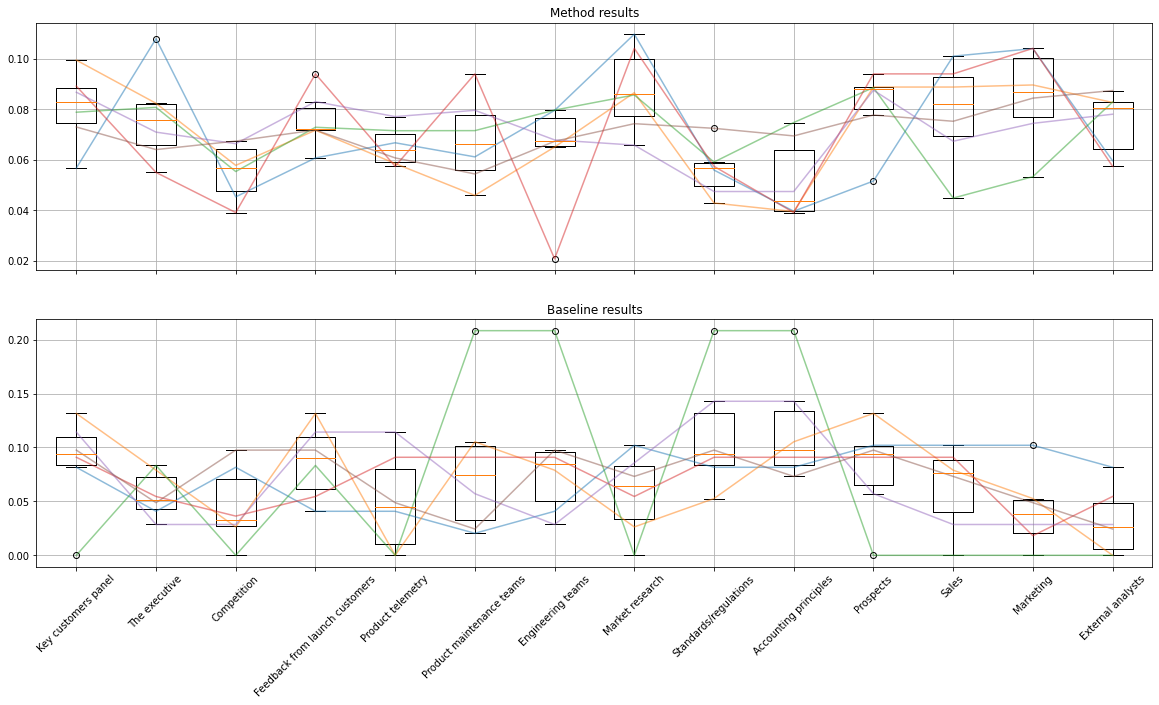

In [434]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1,sharex="col",figsize=(20,10))
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)
data = {"Method results":results[ee], "Baseline results":baseline[ee]}

for index,title in enumerate(data.keys()):
    ax[index].set_title(title)
    ax[index].boxplot(data[title].transpose())
    ax[index].plot(range(1, len(dd)+1),data[title], alpha=0.5)

    ax[index].set_xticks(range(1,len(dd)+1))
    ax[index].set_xticklabels(dd)
    ax[index].grid()
#     ax[index].legend()